In [80]:
import time

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(400, 900))

df = pd.read_csv("../../minimal_data/IoT_vehicleCount_7D_1S.csv")
df['vehicleCount'] = scaler.fit_transform(df['vehicleCount'].values.reshape(-1,1))
df.vehicleCount = df.vehicleCount.astype(int)

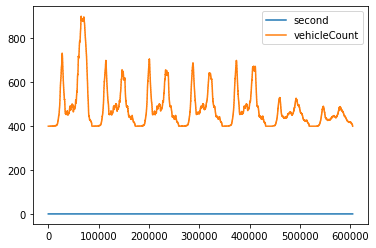

In [81]:
df.plot()

In [82]:
df = df.groupby(np.arange(len(df))//60).mean()
df.vehicleCount = df.vehicleCount.astype(int)
df

,second,vehicleCount
0,1,400
1,1,400
2,1,400
3,1,400
4,1,400
...,...,...
10075,1,403
10076,1,402
10077,1,401
10078,1,400


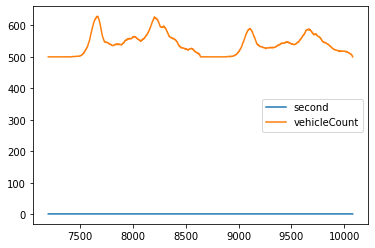

In [75]:
tmp_df = df[-2*24*60:].copy()
tmp_df.plot()

In [61]:
df = df[:-2*24*60]
df

,second,vehicleCount
0,1,500
1,1,500
2,1,500
3,1,500
4,1,500
...,...,...
7195,1,504
7196,1,503
7197,1,502
7198,1,501


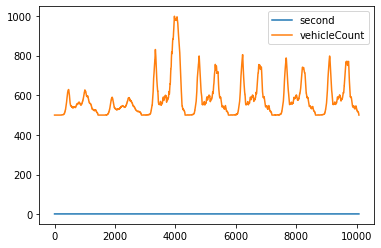

In [62]:
mdf = pd.concat([tmp_df, df], ignore_index=True)
mdf.plot()

In [83]:
mdf = pd.concat([df]*24, ignore_index=True)

In [64]:
mdf = mdf.reset_index()

In [65]:
len(mdf)

86400

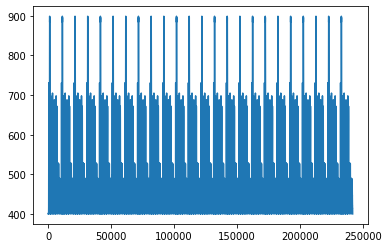

In [84]:
mdf["vehicleCount"].plot()

In [85]:
mdf.set_index("index")

KeyError: "None of ['index'] are in the columns"

In [88]:
mdf.to_csv("../../minimal_data/IoT_400_900_1s_24times.csv")

In [23]:
len(mdf)/7/24/60

514.2857142857142

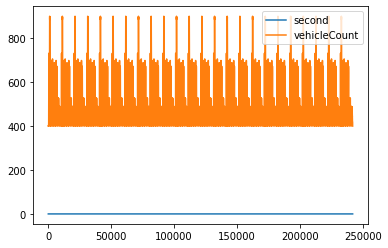

In [89]:
mdf.plot()

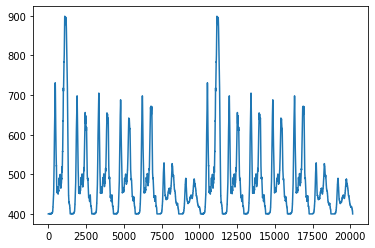

In [91]:
mdf["vehicleCount"][:2*24*60*7].plot()

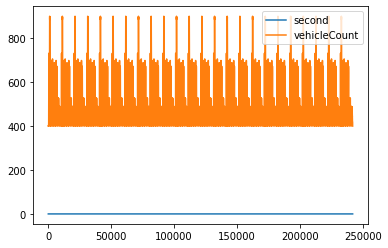

In [86]:
mdf.plot()

In [93]:
mdf.columns.to_list()

['second', 'vehicleCount']

In [94]:
for column in mdf.columns:
    print(column)

second
vehicleCount
